In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

import mysql.connector
from mysql.connector import Error

In [212]:


connection = mysql.connector.connect(host='212.227.90.6',
                                         database='EquipA',
                                         user='EquipoA',
                                         password='E1q2u3i4p5oA')



try:
   if connection.is_connected():
      print("conectado")

      df = pd.DataFrame
      sql= "SELECT *  FROM EquipA.v_marketing2"
   
      df=pd.read_sql(sql,connection)

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
   if connection.is_connected():
        connection.close()
        print("Connection is closed")


conectado


C:\Users\Laura\AppData\Local\Temp\ipykernel_13164\3518449963.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(sql,connection)


Connection is closed


In [213]:
df

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
0,1,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
1,2,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
2,3,56,admin,married,secondary,no,unknown,5,may,1467,1,-1,0,n/a,yes,dmas10,5X,nc
3,4,41,technician,married,secondary,no,unknown,5,may,1389,1,-1,0,n/a,yes,dmas10,4X,nc
4,5,55,services,married,secondary,no,unknown,5,may,579,1,-1,0,n/a,yes,d10,5X,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,26,admin,married,secondary,no,cellular,15,jun,155,1,105,1,failure,yes,d05,2X,m04
16159,21380,37,admin,married,secondary,no,cellular,27,may,242,1,212,1,success,yes,d05,3X,m08
16160,21381,45,management,married,tertiary,no,cellular,30,jul,61,3,-1,0,n/a,no,d02,4X,nc
16161,21382,44,services,single,secondary,no,cellular,12,may,193,1,-1,0,n/a,yes,d05,4X,nc


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16163 non-null  int64 
 1   age             16163 non-null  int64 
 2   job             16163 non-null  object
 3   marital         16163 non-null  object
 4   education       16163 non-null  object
 5   default_credit  16163 non-null  object
 6   contact         16163 non-null  object
 7   contact_day     16163 non-null  int64 
 8   contact_month   16163 non-null  object
 9   duration        16163 non-null  int64 
 10  campaign        16163 non-null  int64 
 11  pdays           16163 non-null  int64 
 12  previous        16163 non-null  int64 
 13  poutcome        16163 non-null  object
 14  deposit         16163 non-null  object
 15  duration_slot   16163 non-null  object
 16  age_slot        16163 non-null  object
 17  pdays_slot      16163 non-null  object
dtypes: int

In [215]:
df.describe()

,id,age,contact_day,duration,campaign,pdays,previous
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,41.265297,15.647157,372.542288,2.508816,51.326734,0.824909
std,6754.310906,11.961583,8.417469,345.261981,2.751196,109.031324,2.241574
min,1.000000,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,4041.500000,32.000000,8.000000,139.000000,1.000000,-1.000000,0.000000
50%,8082.000000,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,17342.500000,49.000000,22.000000,498.000000,3.000000,10.000000,1.000000
max,21383.000000,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


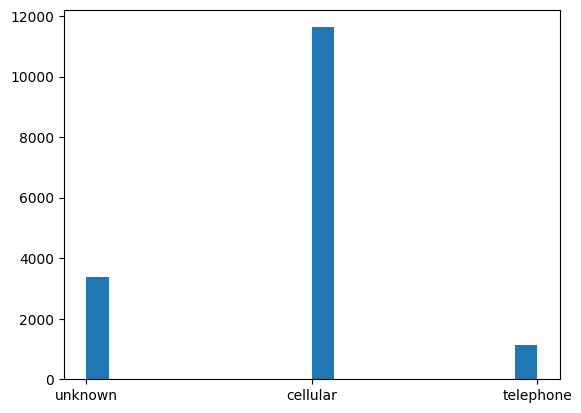

In [216]:
plt.hist(df["contact"],bins=20)
plt.show()

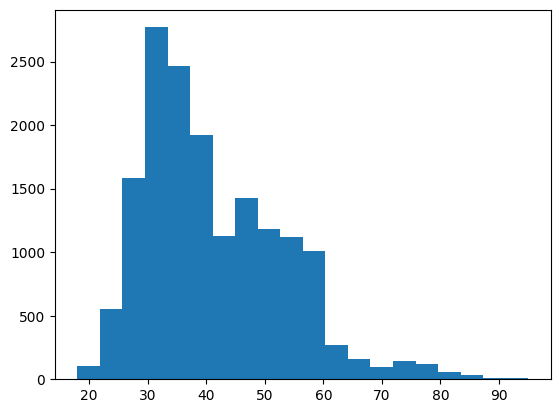

In [217]:
plt.hist(df["age"],bins=20)
plt.show()

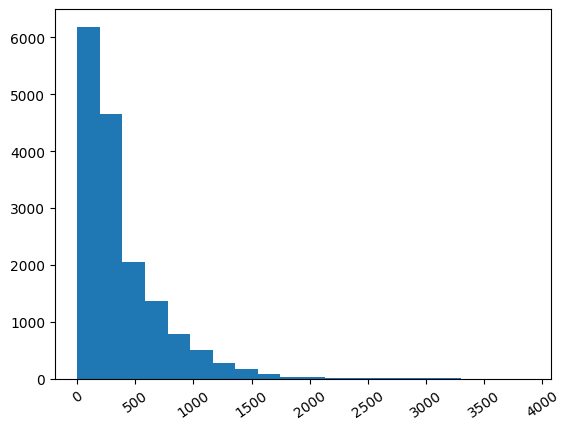

In [218]:
plt.hist(df["duration"],bins=20)
plt.xticks(rotation=35)
plt.show()

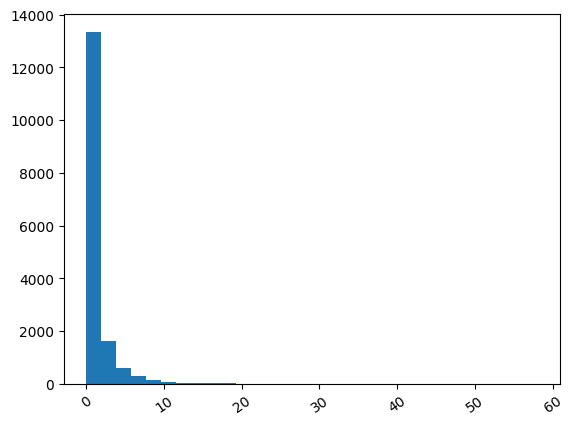

In [219]:
plt.hist(df["previous"],bins=30)
plt.xticks(rotation=35)
plt.show()

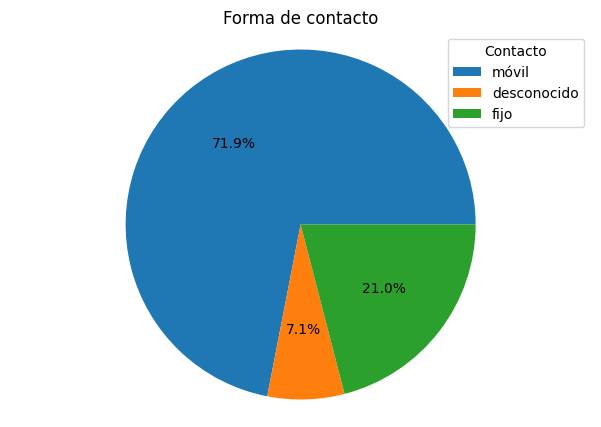

In [220]:
plt.figure(figsize=(7.5, 5))
plt.pie(df.groupby(['contact'])["id"].count(), autopct='%1.1f%%')
plt.title('Forma de contacto')
plt.legend(title="Contacto",labels=["móvil","desconocido","fijo"])
plt.axis('equal')
plt.show()

<Axes: xlabel='contact', ylabel='Count'>

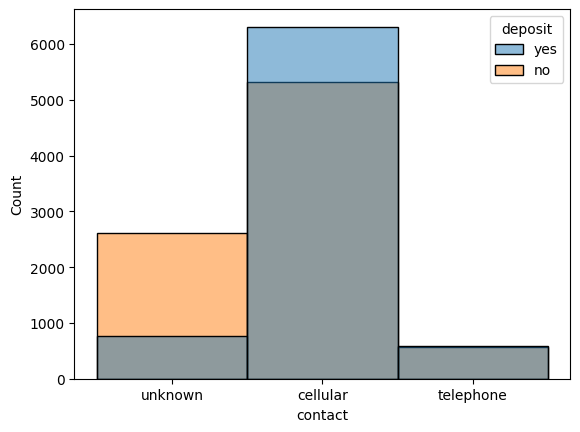

In [221]:
sns.histplot(data=df,x="contact",hue="deposit")

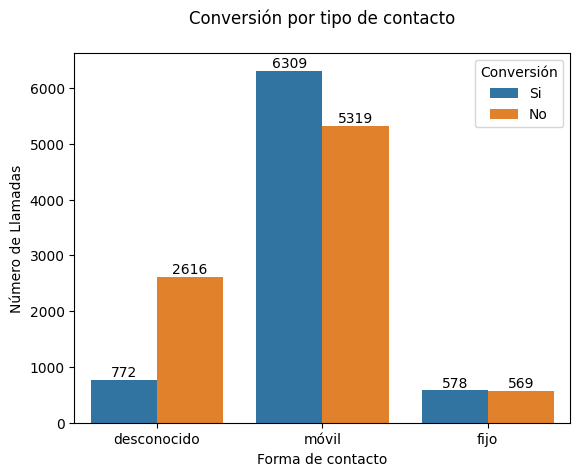

In [222]:
ax=sns.countplot(data=df,x="contact",hue="deposit")
plt.title ("Conversión por tipo de contacto\n")
plt.legend(title="Conversión",labels=["Si","No"])
ax.set_xlabel("Forma de contacto")
ax.set_ylabel("Número de Llamadas")
for c in ax.containers:
   ax.bar_label(c, fmt=lambda x: f'{x:.0f}')
ax.axes.set_xticks(ticks=df["contact"].unique(),labels=["desconocido","móvil","fijo"])
plt.show()

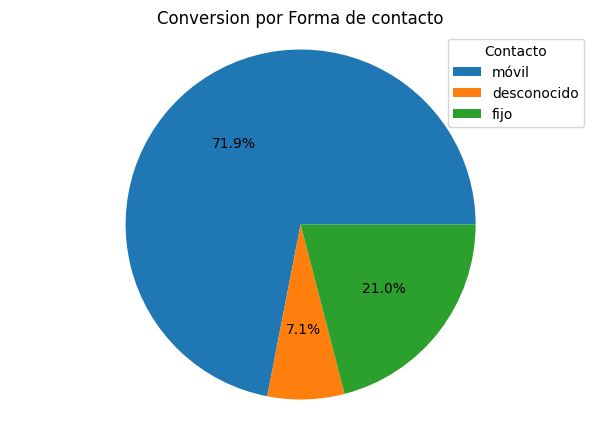

In [223]:
plt.figure(figsize=(7.5, 5))
plt.pie(df.groupby(['contact'])["id"].count(), autopct='%1.1f%%')
plt.title('Conversion por Forma de contacto')
plt.legend(title="Contacto",labels=["móvil","desconocido","fijo"])
plt.axis('equal')
plt.show()

In [224]:
df.groupby(['contact'])["id"].count()

contact
cellular     11628
telephone     1147
unknown       3388
Name: id, dtype: int64

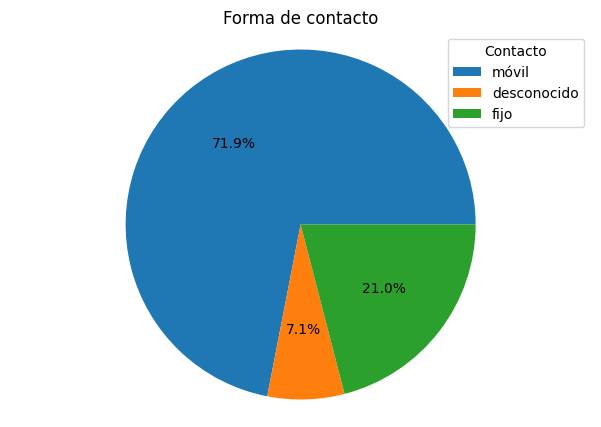

In [225]:
plt.figure(figsize=(7.5, 5))
plt.pie(df.groupby(['contact'])["id"].count(), autopct='%1.1f%%')
plt.title('Forma de contacto')
plt.legend(title="Contacto",labels=["móvil","desconocido","fijo"])
plt.axis('equal')
plt.show()


In [210]:
dfConv=df[df["deposit"]=="yes"]
dfConv.head()

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
0,1,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
1,2,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
2,3,56,admin,married,secondary,no,unknown,5,may,1467,1,-1,0,n/a,yes,dmas10,5X,nc
3,4,41,technician,married,secondary,no,unknown,5,may,1389,1,-1,0,n/a,yes,dmas10,4X,nc
4,5,55,services,married,secondary,no,unknown,5,may,579,1,-1,0,n/a,yes,d10,5X,nc


In [227]:
dfConv.groupby(['contact'])["id"].count()

contact
cellular     6309
telephone     578
unknown       772
Name: id, dtype: int64

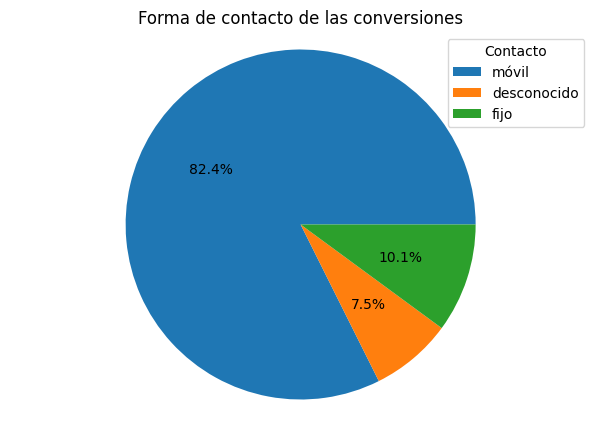

In [228]:
plt.figure(figsize=(7.5, 5))
plt.pie(dfConv.groupby(['contact'])["id"].count(), autopct='%1.1f%%')
plt.title('Forma de contacto de las conversiones')
plt.legend(title="Contacto",labels=["móvil","desconocido","fijo"])
plt.axis('equal')
plt.show()

Miramos cómo convierte cada forma de contacto

In [243]:
dfC=df.groupby(['contact','deposit'])["id"].count().reset_index()
dfC

,contact,deposit,id
0,cellular,no,5319
1,cellular,yes,6309
2,telephone,no,569
3,telephone,yes,578
4,unknown,no,2616
5,unknown,yes,772


In [250]:
dfPer = dfC[dfC['deposit'] == 'yes'].groupby('contact')['id'].sum() / dfC.groupby('contact')['id'].sum() * 100
dfPer

contact
cellular     54.256966
telephone    50.392328
unknown      22.786305
Name: id, dtype: float64

In [268]:
pd.DataFrame(dfPer)

,id
contact,
cellular,54.256966
telephone,50.392328
unknown,22.786305


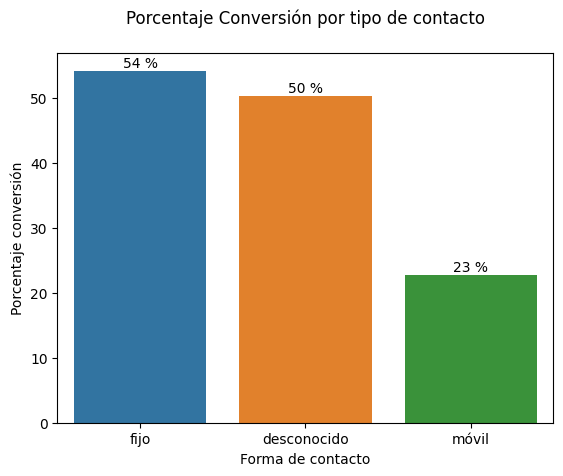

In [279]:
ax=sns.barplot(data=pd.DataFrame(dfPer),y="id",x="contact", hue="contact")
plt.title ("Porcentaje Conversión por tipo de contacto\n")
#plt.legend(title="Conversión",labels=["Si","No"])
ax.set_xlabel("Forma de contacto")
ax.set_ylabel("Porcentaje conversión")
for c in ax.containers:
   ax.bar_label(c, fmt=lambda x: f'{x:.0f} %')
ax.axes.set_xticks(ticks=df["contact"].unique(),labels=["móvil","fijo","desconocido"])
plt.show()

<Axes: xlabel='contact'>

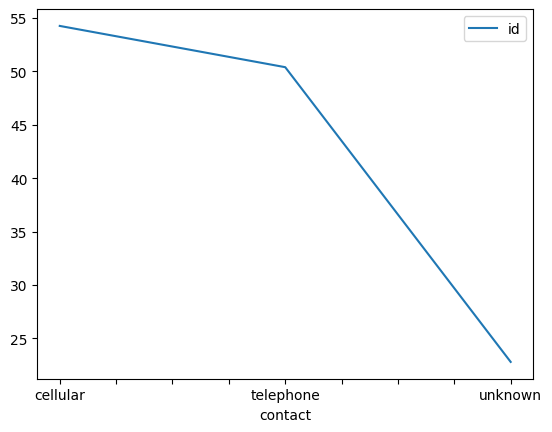

In [266]:
pd.DataFrame(dfPer).plot()

Miramos distintos valores

In [79]:
dfmenos8calls=df[df["campaign"]<8]
dfmenos8calls.head()

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
0,1,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
1,2,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
2,3,56,admin,married,secondary,no,unknown,5,may,1467,1,-1,0,n/a,yes,dmas10,5X,nc
3,4,41,technician,married,secondary,no,unknown,5,may,1389,1,-1,0,n/a,yes,dmas10,4X,nc
4,5,55,services,married,secondary,no,unknown,5,may,579,1,-1,0,n/a,yes,d10,5X,nc


In [100]:
Total=dfmenos8calls.groupby(["campaign"]).id.count().reset_index()
Total

,campaign,id
0,1,6942
1,2,4409
2,3,1916
3,4,1123
4,5,538
5,6,366
6,7,191


In [125]:
Total["id"]

0    6942
1    4409
2    1916
3    1123
4     538
5     366
6     191
Name: id, dtype: int64

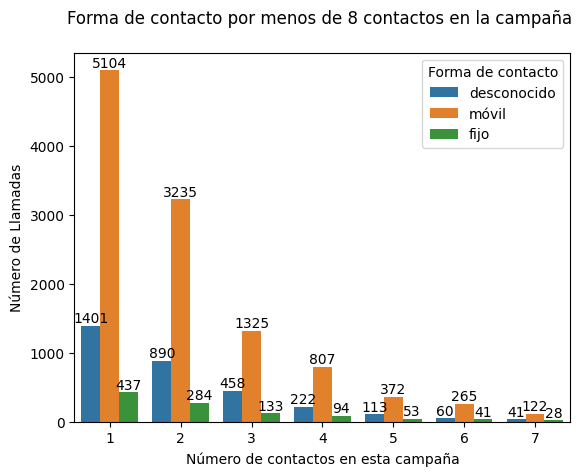

In [135]:
ax=sns.countplot(data=dfmenos8calls,x="campaign",hue="contact")
plt.title ("Tipo de contacto por menos de 8 contactos en la campaña \n")
plt.legend(title="Forma de contacto",labels=["desconocido","móvil","fijo"])
ax.set_xlabel("Número de contactos en esta campaña")
ax.set_ylabel("Número de Llamadas")
for c in ax.containers:
   ax.bar_label(c, fmt=lambda x: f'{x:.0f}')


plt.show()

In [16]:
dslot=df["duration_slot"].sort_values()
dslot.head()

8081    d02
8007    d02
8004    d02
8002    d02
8001    d02
Name: duration_slot, dtype: object

In [17]:
totalslot=df.groupby("duration_slot")["id"].count()
totalslot

duration_slot
d02       4422
d05       4769
d07       2427
d10       1405
dmas10    3140
Name: id, dtype: int64

In [18]:
totalslot=df.groupby(["duration_slot","contact"])["id"].count()
totalslot

duration_slot  contact  
d02            cellular     2908
               telephone     355
               unknown      1159
d05            cellular     3521
               telephone     339
               unknown       909
d07            cellular     1838
               telephone     194
               unknown       395
d10            cellular     1071
               telephone      86
               unknown       248
dmas10         cellular     2290
               telephone     173
               unknown       677
Name: id, dtype: int64

In [19]:
dfts=totalslot.reset_index()
dfts

,duration_slot,contact,id
0,d02,cellular,2908
1,d02,telephone,355
2,d02,unknown,1159
3,d05,cellular,3521
4,d05,telephone,339
5,d05,unknown,909
6,d07,cellular,1838
7,d07,telephone,194
8,d07,unknown,395
9,d10,cellular,1071


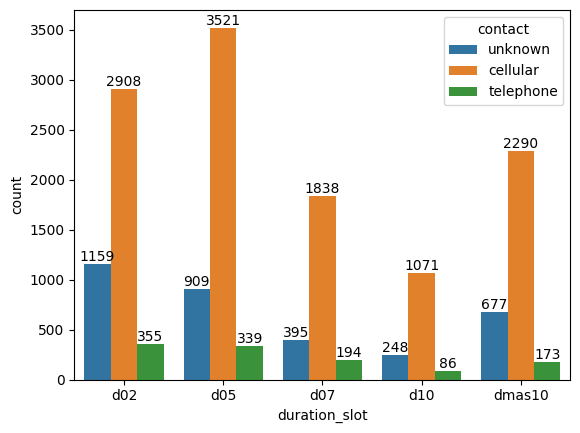

In [136]:
ax=sns.countplot(data=df,x="duration_slot",hue="contact",order=dslot)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

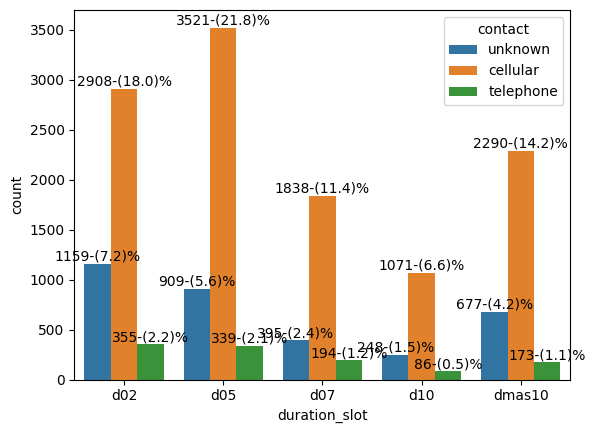

In [143]:
ax=sns.countplot(data=df,x="duration_slot",hue="contact",order=dslot)


for c in ax.containers:
    total=df['duration_slot'].count()
    ax.bar_label(c, fmt=lambda x: f'{x:0.0f}-({(x/total)*100:0.1f})%',)
plt.show()

<Axes: xlabel='age', ylabel='contact'>

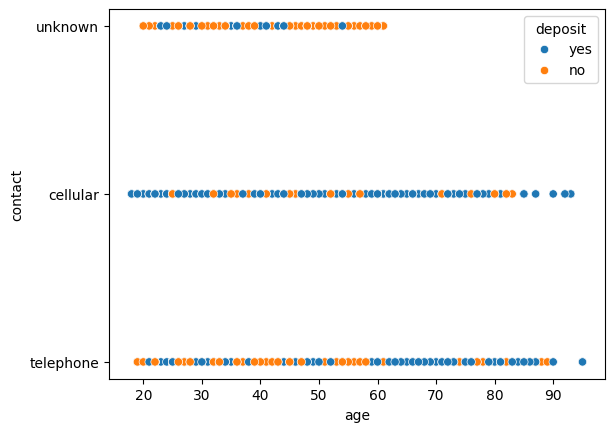

In [152]:
sns.scatterplot(data=df, x="age", y="contact", hue="deposit")

In [22]:
cross_tab=pd.crosstab(index=df['contact'],columns=df['deposit'])
print(cross_tab)


deposit      no   yes
contact              
cellular   5319  6309
telephone   569   578
unknown    2616   772


In [23]:
totalslotage=df.groupby(["age_slot","contact"])["id"].count()
totalslotage

age_slot  contact  
1X        cellular       29
          telephone       2
2X        cellular     1695
          telephone     101
          unknown       407
3X        cellular     4698
          telephone     233
          unknown      1333
4X        cellular     2607
          telephone     235
          unknown       955
5X        cellular     1816
          telephone     273
          unknown       638
6X        cellular      536
          telephone     106
          unknown        55
7X        cellular      209
          telephone     130
8X        cellular       31
          telephone      63
9X        cellular        7
          telephone       4
Name: id, dtype: int64

In [24]:
dageslot=df["age_slot"].sort_values()

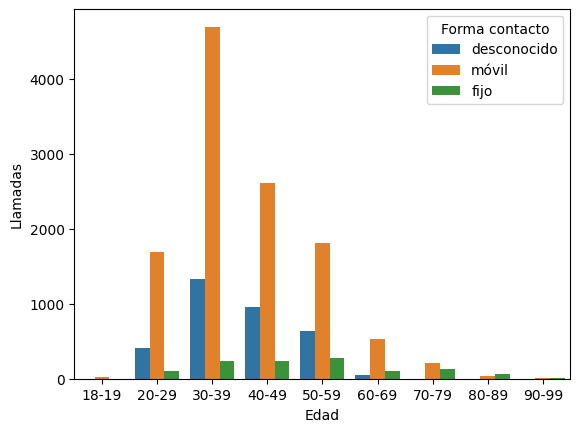

In [155]:
ax=sns.countplot(data=df,x="age_slot",hue="contact",order=dageslot)
ax.set_xlabel("Edad")
ax.set_ylabel("Llamadas")
ax.axes.set_xticks(ticks=dageslot.unique(),labels=["18-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"])
plt.legend(title="Forma contacto",labels=["desconocido","móvil","fijo"])
plt.show()

Entender de dónde vienen contactos  unknown

In [26]:
df_Contact_Unk=df[df["contact"]=="unknown"]
df_Contact_Unk

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
0,1,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
1,2,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
2,3,56,admin,married,secondary,no,unknown,5,may,1467,1,-1,0,n/a,yes,dmas10,5X,nc
3,4,41,technician,married,secondary,no,unknown,5,may,1389,1,-1,0,n/a,yes,dmas10,4X,nc
4,5,55,services,married,secondary,no,unknown,5,may,579,1,-1,0,n/a,yes,d10,5X,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16146,21367,50,blue-collar,married,primary,no,unknown,6,may,678,1,-1,0,n/a,no,dmas10,5X,nc
16147,21368,39,blue-collar,divorced,primary,yes,unknown,5,jun,181,2,-1,0,n/a,no,d05,3X,nc
16148,21369,36,blue-collar,married,primary,no,unknown,20,may,1063,2,-1,0,n/a,yes,dmas10,3X,nc
16152,21373,41,blue-collar,married,secondary,no,unknown,15,may,1162,4,-1,0,n/a,yes,dmas10,4X,nc


In [27]:
df_Contact_Unk["id"].count()

3388

In [28]:
df_Contact_Unk.describe()

,id,age,contact_day,duration,campaign,pdays,previous
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,10428.408501,40.386068,15.713105,366.613341,2.767119,2.602715,0.033058
std,6342.276517,9.414934,8.378469,384.244706,3.553433,45.502383,0.757269
min,1.000000,20.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,6341.250000,33.000000,8.000000,115.000000,1.000000,-1.000000,0.000000
50%,9066.500000,39.000000,16.000000,226.000000,2.000000,-1.000000,0.000000
75%,17362.000000,47.000000,21.000000,496.500000,3.000000,-1.000000,0.000000
max,21377.000000,61.000000,31.000000,3881.000000,63.000000,782.000000,41.000000


In [29]:
df_Contact_Unk.value_counts("campaign")

campaign
1     1401
2      890
3      458
4      222
5      113
6       60
9       43
7       41
8       33
10      23
11      20
12      14
15      10
18      10
13       9
14       6
17       5
26       4
16       4
23       3
32       3
20       2
19       2
29       2
30       2
41       2
63       2
21       1
24       1
25       1
28       1
Name: count, dtype: int64

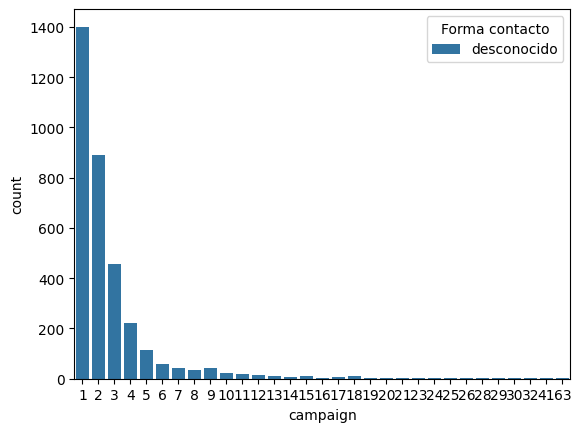

In [157]:
sns.countplot(data=df_Contact_Unk,x="campaign",hue="contact")
plt.legend(title="Forma contacto",labels=["desconocido"])
plt.show()

Podemos observar que la mayoría han tenido pocos contactos 

In [31]:
df_Contact_Unk.value_counts("poutcome")

poutcome
n/a        3360
failure      11
other         9
success       8
Name: count, dtype: int64

In [32]:
df_Contact_Unk.value_counts("pdays_slot")

pdays_slot
nc       3360
mas15      11
m15         8
m04         3
m03         2
m05         2
m06         1
m12         1
Name: count, dtype: int64

In [33]:
df_Contact_Unk.value_counts("previous")

previous
0     3360
2       10
1        8
4        4
6        4
3        1
41       1
Name: count, dtype: int64

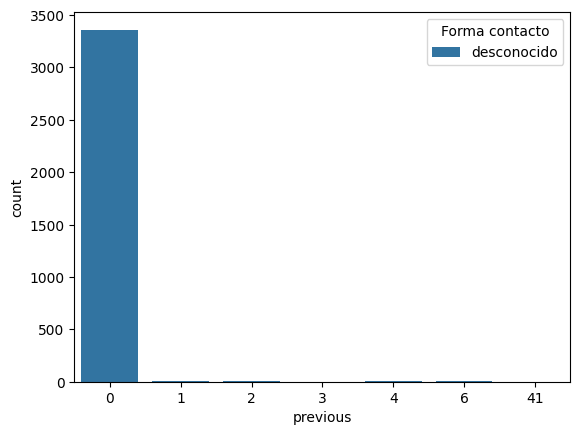

In [158]:
sns.countplot(data=df_Contact_Unk,x="previous",hue="contact")
plt.legend(title="Forma contacto",labels=["desconocido"])
plt.show()

Segun vemos en previous y pdays hay 3360 (99%) que sí habian sido contactados y 28 (1%) no contactados previamente, parece que hay una relación entre haber contactado anteriormente para otra campaña y tener este campo informado.

Estudiamos los registros de los que no habían sido contactados antes

In [35]:
df_nc=df[df["pdays_slot"]=="nc"]
df_nc.head()

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
0,1,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
1,2,59,admin,married,secondary,no,unknown,5,may,1042,1,-1,0,n/a,yes,dmas10,5X,nc
2,3,56,admin,married,secondary,no,unknown,5,may,1467,1,-1,0,n/a,yes,dmas10,5X,nc
3,4,41,technician,married,secondary,no,unknown,5,may,1389,1,-1,0,n/a,yes,dmas10,4X,nc
4,5,55,services,married,secondary,no,unknown,5,may,579,1,-1,0,n/a,yes,d10,5X,nc


In [36]:
df_nc["id"].count()

12072

In [37]:
df_nc.groupby(["contact","pdays_slot"])["id"].count()


contact    pdays_slot
cellular   nc            7869
telephone  nc             843
unknown    nc            3360
Name: id, dtype: int64

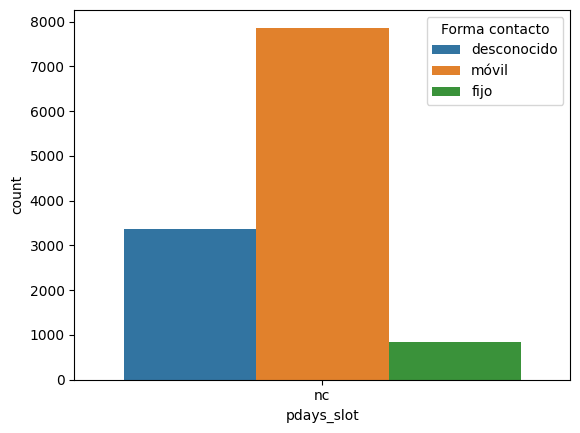

In [159]:
sns.countplot(data=df_nc,x="pdays_slot",hue="contact")
plt.legend(title="Forma contacto",labels=["desconocido","móvil","fijo"])
plt.show()

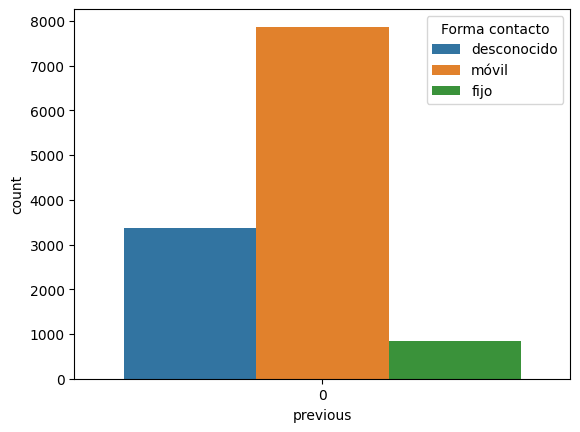

In [160]:
sns.countplot(data=df_nc,x="previous",hue="contact")
plt.legend(title="Forma contacto",labels=["desconocido","móvil","fijo"])
plt.show()

Vemos que en las llamadas a los que no habian sido contactados previamente (12072), hay 3360 no tienen la informacion de la forma de contacto (28%), por lo que se puede afirmar que la mayoria de los no contactados previamente (el 72%) se están registrando correctamente y no podemos afirmar que la causa de tener unknown en contanto se deba solamente a no haber tenido un contacto previo.

Exploramos  los que han sido contactados previamente

In [162]:
df_no_nc=df[df["pdays_slot"]!="nc"]
df_no_nc.head()

,id,age,job,marital,education,default_credit,contact,contact_day,contact_month,duration,campaign,pdays,previous,poutcome,deposit,duration_slot,age_slot,pdays_slot
891,892,42,admin,single,secondary,no,telephone,21,oct,519,1,166,1,other,yes,d10,4X,m06
892,893,33,services,married,secondary,no,telephone,21,oct,144,1,91,4,failure,yes,d02,3X,m04
900,901,56,technician,married,secondary,no,unknown,23,oct,518,1,147,2,success,yes,d10,5X,m05
934,935,34,admin,married,tertiary,no,unknown,12,nov,114,1,170,3,failure,yes,d02,3X,m06
952,953,53,retired,married,tertiary,no,cellular,17,nov,1091,2,150,1,success,yes,dmas10,5X,m06


In [163]:
df_no_nc["id"].count()

4091

In [164]:
df_no_nc.groupby(["contact"])["id"].count()

contact
cellular     3759
telephone     304
unknown        28
Name: id, dtype: int64

<Axes: xlabel='pdays_slot', ylabel='count'>

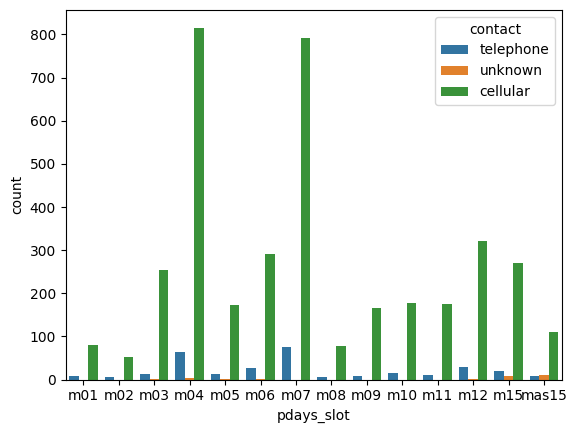

In [161]:
sns.countplot(data=df_no_nc,x="pdays_slot",hue="contact",order=df_no_nc["pdays_slot"].sort_values())

Miramos el detalle de los meses en el que se había contactado previamente sólo para los unknown

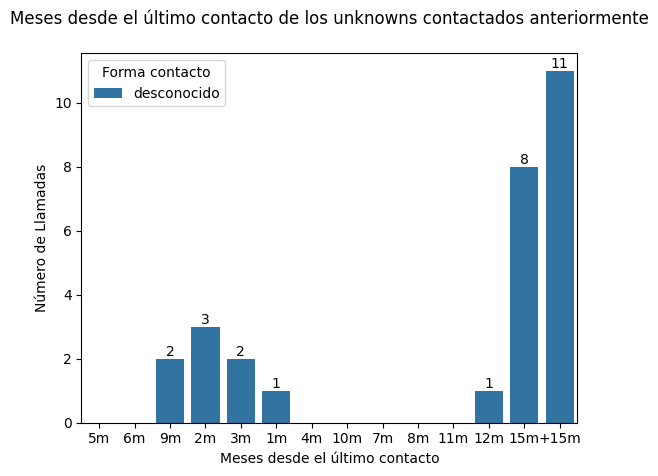

In [185]:
ax=sns.countplot(data=df_Contact_Unk,x="pdays_slot",hue="contact",order=df_no_nc["pdays_slot"].sort_values())
plt.title ("Meses desde el último contacto de los unknowns contactados anteriormente\n")
ax.set_xlabel("Meses desde el último contacto")
ax.set_ylabel("Número de Llamadas")
for c in ax.containers:
   ax.bar_label(c, fmt=lambda x: f'{x:.0f}')
ax.axes.set_xticks(ticks=df_no_nc["pdays_slot"].unique(),labels=["1m","2m","3m","4m","5m","6m","7m","8m","9m","10m","11m","12m","15m","+15m"])
plt.legend(title="Forma contacto",labels=["desconocido"])
plt.show()

<Axes: xlabel='previous', ylabel='count'>

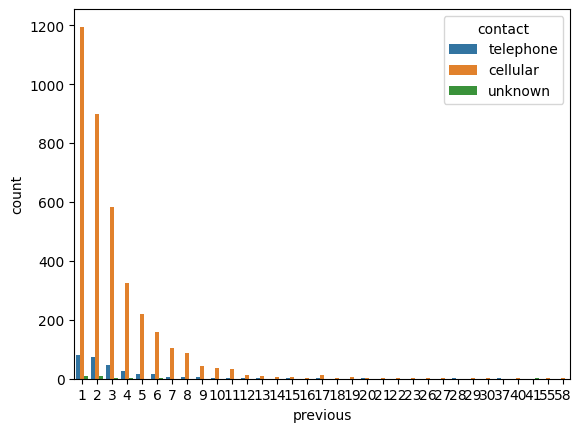

In [44]:
sns.countplot(data=df_no_nc,x="previous",hue="contact")

Continuamos explorando los que tienen contacto unknown para ver si vemos algo más

In [45]:
df_Contact_Unk.value_counts("deposit")

deposit
no     2616
yes     772
Name: count, dtype: int64

In [46]:
df_Contact_Unk.value_counts("duration_slot").sort_index()

duration_slot
d02       1159
d05        909
d07        395
d10        248
dmas10     677
Name: count, dtype: int64

In [47]:
df_Contact_Unk.value_counts("age_slot").sort_index()

age_slot
2X     407
3X    1333
4X     955
5X     638
6X      55
Name: count, dtype: int64

In [48]:
df_Contact_Unk.value_counts("education").sort_index()

education
primary       662
secondary    1840
tertiary      749
unknown       137
Name: count, dtype: int64